In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Rig\Pandora's BOX\ML ig\Datasets\penguins_Clustering.csv")

In [3]:
df.shape

(344, 5)

In [4]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
df.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,335.000000,335.000000,335.000000,335.000000
mean,43.988358,17.169552,214.355224,4209.179104
std,5.453430,1.971966,263.253508,803.633495
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.550000,18.700000,213.000000,4787.500000
max,59.600000,21.500000,5000.000000,6300.000000


In [8]:
df.value_counts('sex')

sex
MALE      169
FEMALE    165
.           1
Name: count, dtype: int64

In [9]:
df = df[df['sex'] != '.']

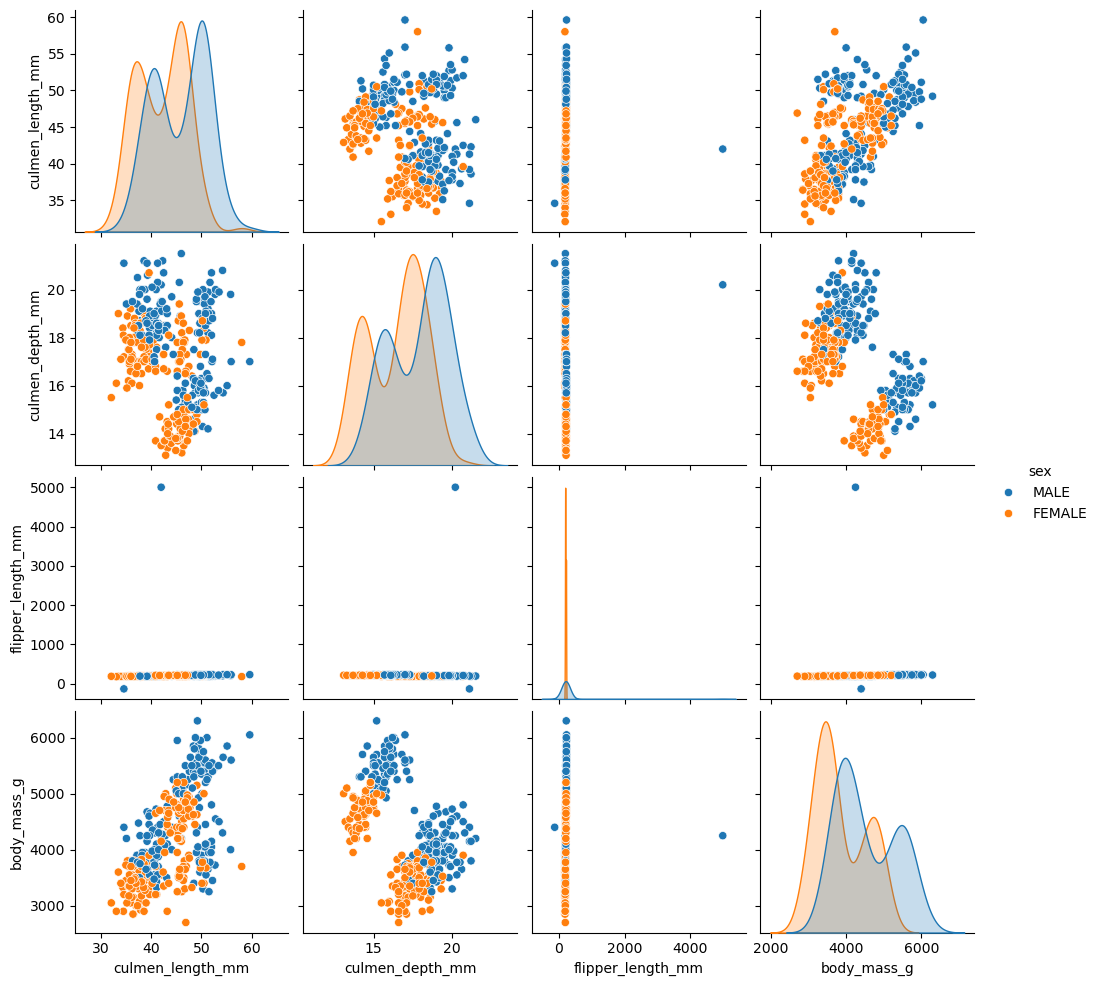

In [10]:
sns.pairplot(df, hue='sex')

In [11]:
df['sex'] = df['sex'].map({'MALE': 1,'FEMALE': 0})

In [12]:
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0
340,46.8,14.3,215.0,4850.0,0
341,50.4,15.7,222.0,5750.0,1
342,45.2,14.8,212.0,5200.0,0


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df)

### PCA

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

In [16]:
from sklearn.cluster import KMeans

### Manual method

In [18]:
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

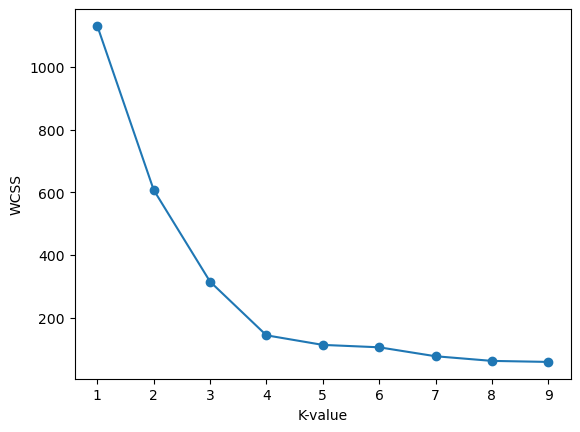

In [19]:
plt.plot(range(1,10), wcss, marker='o')
plt.xticks(range(1,10))
plt.xlabel('K-value')
plt.ylabel('WCSS')

In [20]:
kmeans = KMeans(n_clusters=4,init='k-means++', random_state=42)
kmeans.fit(X_pca)
pred = kmeans.fit_predict(X_pca)    # ---> This is it. U can plot it if u want. Imma plot this in the end

### Automatic method using the kneed library

In [22]:
!pip install kneed

In [23]:
from kneed import KneeLocator

kl = KneeLocator(range(1,10), wcss, curve='convex', direction = 'decreasing')
kl.elbow

4

In [24]:
from sklearn.metrics import silhouette_score

sil_score = []
for i in range(2,10):                           # Use value of i >=2, or error pops up
    kmeans = KMeans(n_clusters=i,init='k-means++', random_state=42)
    kmeans.fit(X_pca)
    ypred = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, ypred)
    sil_score.append(score)

Text(0, 0.5, 'Silhouette Score')

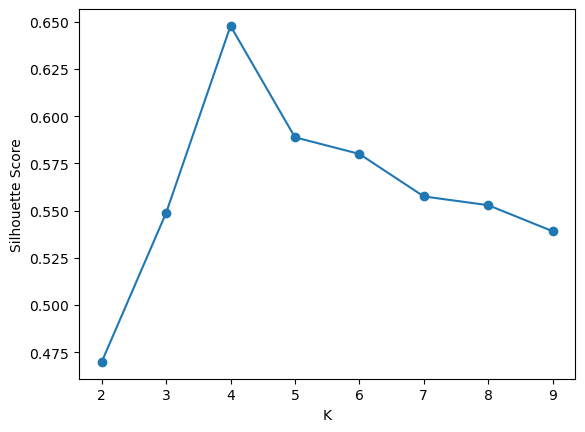

In [25]:
plt.plot(range(2,10), sil_score, marker='o')
plt.xlabel('K')
plt.xticks(range(2,10))
plt.ylabel('Silhouette Score')

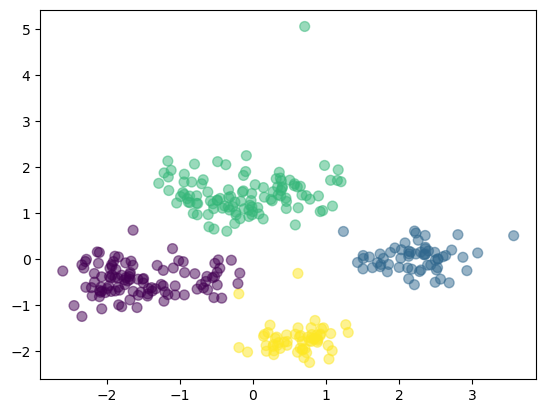

In [26]:
plt.scatter(X_pca[:,0], X_pca[:,1],c=pred,s=50,alpha=0.5)